### MNIST dataset
https://github.com/zalandoresearch/fashion-mnist

In [3]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 12s 3us/step


In [12]:
print(train_images.shape) # 28x28 images
print(train_labels.shape) # 10 classes of objects labled: 0, 1, ... 9
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


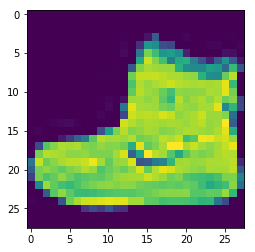

In [21]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
# print(train_labels[0])
# print(train_images[0])

### Example 1 (one hidden layer)

In [44]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalization
train_images = train_images/255.0
test_images = test_images/255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),       # 28x28 input images
    keras.layers.Dense(128, activation=tf.nn.relu),  # ??
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 labels
])
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)

1.13.1
Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4968 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3756 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3381 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3133 - acc: 0.8852
Epoch 5/5
10000/10000 [==============================] - 0s 31us/sample - loss: 0.3489 - acc: 0.8760


[0.348905003118515, 0.876]

### Example 2 (probability vector)

In [37]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[1.0545021e-08 5.8763706e-12 1.2462370e-10 2.5150542e-17 3.8713057e-13
 7.4242867e-06 2.7809918e-10 1.0669222e-03 4.6506266e-14 9.9892563e-01]
9


### Example 3 (more neurons)

In [41]:
# Increase to 1024 Neurons - Training takes longer, but is more accurate
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(train_images, train_labels) ,  (test_images, test_labels) = mnist.load_data()
train_images = train_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
11493376/11490434 [==============================] - 13s 1us/step
Epoch 1/5
60000/60000 [==============================] - 16s 267us/sample - loss: 0.1852 - acc: 0.9442
Epoch 2/5
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0755 - acc: 0.9770
Epoch 3/5
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0490 - acc: 0.9846
Epoch 4/5
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0351 - acc: 0.9887
Epoch 5/5
10000/10000 [==============================] - 1s 64us/sample - loss: 0.0825 - acc: 0.9783
[6.3254152e-10 5.9468007e-11 4.6659193e-10 3.1324416e-05 1.0965129e-16
 3.9181922e-11 5.7640228e-15 9.9996865e-01 4.0229282e-09 4.4333081e-08]
7


### Example 4 (more layers)

In [42]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(train_images, train_labels) ,  (test_images, test_labels) = mnist.load_data()
train_images = train_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.1844 - acc: 0.9436
Epoch 2/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0794 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0545 - acc: 0.9832
Epoch 4/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0412 - acc: 0.9868
Epoch 5/5
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0694 - acc: 0.9788
[1.1738612e-11 5.7097154e-08 5.7712157e-08 1.3371258e-08 6.9023142e-12
 7.3062112e-11 5.4065181e-16 9.9999905e-01 3.2065930e-09 9.3257444e-07]
7


### Example 5 (no normalization)

In [45]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images=train_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 14.3085 - acc: 0.1123
Epoch 2/5
60000/60000 [==============================] - 8s 132us/sample - loss: 14.3070 - acc: 0.1124
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 14.3070 - acc: 0.1124
Epoch 4/5
60000/60000 [==============================] - 8s 135us/sample - loss: 14.3070 - acc: 0.1124
Epoch 5/5
10000/10000 [==============================] - 0s 46us/sample - loss: 14.2887 - acc: 0.1135
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
7


### Example 6 (callback - stop with loss < 0.4)

In [46]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images=train_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4739 - acc: 0.8304
Epoch 2/5
59712/60000 [============================>.] - ETA: 0s - loss: 0.3572 - acc: 0.8706
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3575 - acc: 0.8705


### Example 7 (callback - stop with acc > 0.88)

In [48]:
import tensorflow as tf
from tensorflow import keras

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.88):
            print("\nReached 88% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images=train_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4741 - acc: 0.8317
Epoch 2/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3576 - acc: 0.8690
Epoch 3/5
59744/60000 [============================>.] - ETA: 0s - loss: 0.3229 - acc: 0.8803
Reached 88% accuracy so cancelling training!
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3229 - acc: 0.8802


### Example 8

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) ,  (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

model.fit(train_images, train_labels, epochs=20, callbacks=[callbacks])
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/20
60000/60000 [==============================] - 10s 171us/sample - loss: 0.4679 - acc: 0.8310
Epoch 2/20
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3537 - acc: 0.8695
Epoch 3/20
60000/60000 [==============================] - 10s 165us/sample - loss: 0.3200 - acc: 0.8816
Epoch 4/20
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2985 - acc: 0.8883
Epoch 5/20
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2801 - acc: 0.8954
Epoch 6/20
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2637 - acc: 0.8996
Epoch 7/20
59872/60000 [============================>.] - ETA: 0s - loss: 0.2503 - acc: 0.9060
Reached 90% accuracy so cancelling training!
10000/10000 [==============================] - 0s 32us/sample - loss: 0.3348 - acc: 0.8858


In [2]:
train_images.shape

(60000, 28, 28)

In [5]:
type(train_images)

numpy.ndarray

In [40]:
import json
class Foo(object):
    def __init__(self):
        self.x = 1
        self.y = 2
    def __str__(self):
        return json.dumps(self.__dict__)

foo = Foo()
print(foo)

#s = json.dumps(foo.__dict__) # s set to: {"x":1, "y":2}
#print(s)

{"x": 1, "y": 2}


In [42]:
print("{0:.0%}".format(1.))

100%
